In [1]:
pip install kagglehub


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#Proto BIoengineering MIT-BIH Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("protobioengineering/mit-bih-arrhythmia-database-modern-2023")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shree\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\4


In [4]:
print(os.listdir(path))

['100_annotations_1.csv', '100_annotations_1.json', '100_ekg.csv', '100_ekg.json', '101_annotations_1.csv', '101_annotations_1.json', '101_ekg.csv', '101_ekg.json', '102_annotations_1.csv', '102_annotations_1.json', '102_ekg.csv', '102_ekg.json', '103_annotations_1.csv', '103_annotations_1.json', '103_ekg.csv', '103_ekg.json', '104_annotations_1.csv', '104_annotations_1.json', '104_ekg.csv', '104_ekg.json', '105_annotations_1.csv', '105_annotations_1.json', '105_ekg.csv', '105_ekg.json', '106_annotations_1.csv', '106_annotations_1.json', '106_ekg.csv', '106_ekg.json', '107_annotations_1.csv', '107_annotations_1.json', '107_ekg.csv', '107_ekg.json', '108_annotations_1.csv', '108_annotations_1.json', '108_annotations_2.csv', '108_ekg.csv', '108_ekg.json', '109_annotations_1.csv', '109_annotations_1.json', '109_ekg.csv', '109_ekg.json', '111_annotations_1.csv', '111_annotations_1.json', '111_ekg.csv', '111_ekg.json', '112_annotations_1.csv', '112_annotations_1.json', '112_ekg.csv', '112_e

In [5]:
ekg_df = pd.read_csv(path + "/100_ekg.csv")
print(ekg_df.head())
print(ekg_df.shape)


   Unnamed: 0   MLII     V5 symbol
0           0 -0.145 -0.065    NaN
1           1 -0.145 -0.065    NaN
2           2 -0.145 -0.065    NaN
3           3 -0.145 -0.065    NaN
4           4 -0.145 -0.065    NaN
(650000, 4)


In [6]:
print(ekg_df.columns)


Index(['Unnamed: 0', 'MLII', 'V5', 'symbol'], dtype='object')


In [7]:
ann_df = pd.read_csv(path + "/100_annotations_1.csv")
print(ann_df.head())
print(ann_df.shape)


   index annotation_symbol
0     18                 +
1     77                 N
2    370                 N
3    662                 N
4    946                 N
(2274, 2)


In [8]:
ecg100 = pd.read_csv(path + "/100_ekg.csv")
ecg100 

,Unnamed: 0,MLII,V5,symbol
0,0,-0.145,-0.065,NaN
1,1,-0.145,-0.065,NaN
2,2,-0.145,-0.065,NaN
3,3,-0.145,-0.065,NaN
4,4,-0.145,-0.065,NaN
...,...,...,...,...
649995,649995,-0.075,-0.480,NaN
649996,649996,-0.445,-0.410,NaN
649997,649997,-0.675,-0.365,NaN
649998,649998,-0.765,-0.335,NaN


In [9]:
ecg100['time_sec'] = ecg100.index/360
ecg100

,Unnamed: 0,MLII,V5,symbol,time_sec
0,0,-0.145,-0.065,NaN,0.000000
1,1,-0.145,-0.065,NaN,0.002778
2,2,-0.145,-0.065,NaN,0.005556
3,3,-0.145,-0.065,NaN,0.008333
4,4,-0.145,-0.065,NaN,0.011111
...,...,...,...,...,...
649995,649995,-0.075,-0.480,NaN,1805.541667
649996,649996,-0.445,-0.410,NaN,1805.544444
649997,649997,-0.675,-0.365,NaN,1805.547222
649998,649998,-0.765,-0.335,NaN,1805.550000


Text(0.5, 1.0, 'Patient 100')

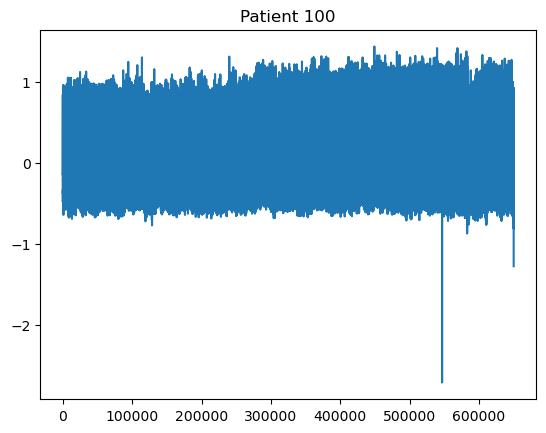

In [10]:
ecg100['MLII'].plot()
plt.title("Patient 100")


Text(0.5, 1.0, 'Heartbeats of Patient 100')

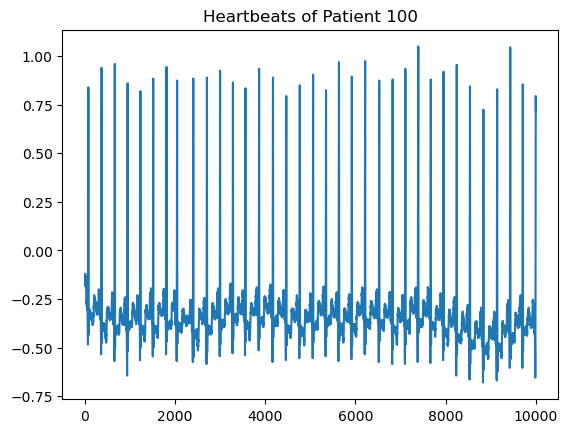

In [11]:
ecg100[0:10000]['MLII'].plot()
plt.title("Heartbeats of Patient 100")

In [12]:
pip install scipy

In [13]:
#from scipy import signal

#peaks, metadata = signal.find_peaks(ecg100[0:100]['MLII'], height = 0.6)

#ecg100[0:100]["MLII"].plot()

#plt.plot(peaks,ecg100[0:100]['MLII'][peaks], 'x')

#plt.title("First R waves of patient 100")
#plt.show()

In [14]:
folder_path = path
ekg_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and 'ekg' in f]

patients = sorted({f.split('_')[0] for f in ekg_files})
print("Patients in dataset:", patients)

Patients in dataset: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [15]:
print(os.listdir(path))

['100_annotations_1.csv', '100_annotations_1.json', '100_ekg.csv', '100_ekg.json', '101_annotations_1.csv', '101_annotations_1.json', '101_ekg.csv', '101_ekg.json', '102_annotations_1.csv', '102_annotations_1.json', '102_ekg.csv', '102_ekg.json', '103_annotations_1.csv', '103_annotations_1.json', '103_ekg.csv', '103_ekg.json', '104_annotations_1.csv', '104_annotations_1.json', '104_ekg.csv', '104_ekg.json', '105_annotations_1.csv', '105_annotations_1.json', '105_ekg.csv', '105_ekg.json', '106_annotations_1.csv', '106_annotations_1.json', '106_ekg.csv', '106_ekg.json', '107_annotations_1.csv', '107_annotations_1.json', '107_ekg.csv', '107_ekg.json', '108_annotations_1.csv', '108_annotations_1.json', '108_annotations_2.csv', '108_ekg.csv', '108_ekg.json', '109_annotations_1.csv', '109_annotations_1.json', '109_ekg.csv', '109_ekg.json', '111_annotations_1.csv', '111_annotations_1.json', '111_ekg.csv', '111_ekg.json', '112_annotations_1.csv', '112_annotations_1.json', '112_ekg.csv', '112_e

In [16]:
ann_df.head

<bound method NDFrame.head of        index annotation_symbol
0         18                 +
1         77                 N
2        370                 N
3        662                 N
4        946                 N
...      ...               ...
2269  648978                 N
2270  649232                 N
2271  649484                 N
2272  649734                 N
2273  649991                 N

[2274 rows x 2 columns]>

In [17]:
ekg_df

,Unnamed: 0,MLII,V5,symbol
0,0,-0.145,-0.065,NaN
1,1,-0.145,-0.065,NaN
2,2,-0.145,-0.065,NaN
3,3,-0.145,-0.065,NaN
4,4,-0.145,-0.065,NaN
...,...,...,...,...
649995,649995,-0.075,-0.480,NaN
649996,649996,-0.445,-0.410,NaN
649997,649997,-0.675,-0.365,NaN
649998,649998,-0.765,-0.335,NaN


In [18]:
ann_df

,index,annotation_symbol
0,18,+
1,77,N
2,370,N
3,662,N
4,946,N
...,...,...
2269,648978,N
2270,649232,N
2271,649484,N
2272,649734,N


In [19]:
all_x = []
all_y = []

label_map = {'N': 0, 'A': 1}

for p in patients:
    ekg_file = os.path.join(folder_path, f"{p}_ekg.csv")
    ann_file = os.path.join(folder_path, f"{p}_annotations_1.csv")

    ekg_df = pd.read_csv(ekg_file)
    ann_df = pd.read_csv(ann_file)

    ann_df['label'] = ann_df["annotation_symbol"].map(label_map)

    ann_df = ann_df.dropna(subset = ['label'])

    ekg_df = ekg_df.drop(columns = ['symbol' , 'Unnamed: 0'])

    X = ekg_df.iloc[ann_df['index']].values
    y = ann_df['label'].values

all_x.append(X)
all_y.append(y)

X = np.vstack(all_x)
y = np.hstack(all_y)



print(X)
print(y)
print(X.shape)
print(y.shape)

[[1.66  0.525]
 [1.735 0.35 ]
 [1.745 0.335]
 ...
 [1.54  0.565]
 [1.66  0.48 ]
 [1.635 0.495]]
[0. 0. 0. ... 0. 0. 0.]
(2700, 2)
(2700,)


#Model Training

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify = y)


In [21]:
ekg_df.dtypes

MLII    float64
V1      float64
dtype: object

In [24]:
print(type(X_train))     # should be numpy.ndarray
print(X_train.dtype)    # should be float


<class 'numpy.ndarray'>
float64


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000, solver = 'lbfgs', multi_class = 'auto')
model.fit(X_train, y_train)


c:\Users\shree\anac\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.float64(0.0)